In [101]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [102]:
files = os.listdir('../NAPLab-LiDAR/labels/')
with open("../NAPLab-LiDAR/names.txt", 'r') as names:
    class_names = [name for name in names.read().split('\n') if name]
class_names

['car', 'truck', 'bus', 'motorcycle', 'bicycle', 'scooter', 'person', 'rider']

In [103]:
col_labels = ['classID', 'x', 'y', 'width', 'height']
dataset_boxes = pd.concat([
    pd.read_csv(
        f"../NAPLab-LiDAR/labels/{filename}",
        sep=' ',
        names=col_labels)
    .reindex(['frame', *col_labels], axis='columns')
    .assign(frame=filename)
    for filename in files
], ignore_index=True)

boxes per image

In [104]:
dataset_boxes.groupby('frame')['classID'].agg(len).describe()

count    1905.000000
mean       12.372178
std         6.456428
min         1.000000
25%         8.000000
50%        13.000000
75%        16.000000
max        53.000000
Name: classID, dtype: float64

In [105]:
class_count = np.unique(dataset_boxes.classID.values, return_counts=True)
class_count

(array([0, 1, 2, 4, 5, 6, 7], dtype=int64),
 array([10901,   123,   532,  1033,   588,  8506,  1886], dtype=int64))

['car', 'truck', 'bus', 'motorcycle', 'bicycle', 'scooter', 'person', 'rider']

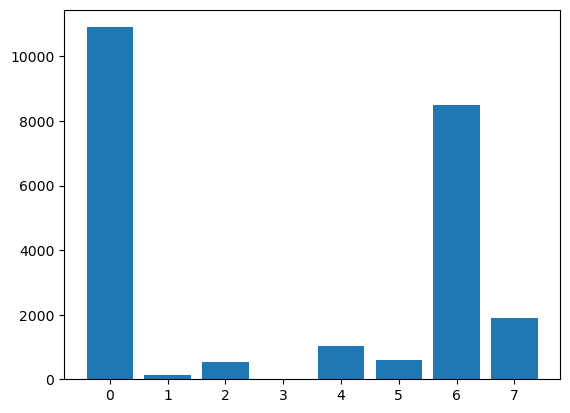

In [106]:
plt.bar(*class_count)
class_names